# Introdução

Pode-se modelar um pêndulo simples da seguinte forma:
$$ \frac{d^2\theta}{dt^2} + \frac{g}{L} \sin{\theta} = 0 $$

Porém, as biblitecas do Python só aceitam EDOs de primeira ordem, logo teremos que fazer a seguinte substituição:

$$ \frac{d\theta}{dt} = \omega $$
$$ \frac{d\omega}{dt} + \frac{g}{L} \sin{\theta} = 0 $$

Assim, trocamos um equação diferencial de segunda ordem por duas de primeira ordem.


In [13]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
from scipy.integrate import odeint

In [14]:
def extract_data(size):
	"""
	This funtion extract data from excell files and return a numpy array
	with 8 columns, time, 4 columns, and acceleration in axis x, y, z and total.

	Argument size recive: 
	1. 'small'  == 16.54°
	2. 'medium' == 49.15°
	3. 'high_1' == 49.92°
	4. 'high_2' == 54.92°
	
	"""

	if size == "small":
		data = pd.read_excel(r'data/small_height.xls')
	if size == "medium":
		data = pd.read_excel(r'data/medium_height.xls')
	if size == "high_1":
		data = pd.read_excel(r'data/high_height_1.xls')
	if size == "high_2":
		data = pd.read_excel(r'data/high_height_2.xls')
	data = np.array(data)

	return data


In [15]:
def refine_data(data, size):
	"""
	Remove columns about acceleration in axis x, y and total acceleration.
	Also remove noyse data at begin.
	"""

	data = np.delete(data, [1, 2, 3, 4, 6, 7], 1)

	# remove noisy data
	if size == "high_1":
		end = 400
	elif size == "high_2":
		end = 200
	elif size == "medium":
		end = 300
	elif size == "small":
		end = 500

	data = np.delete(data, slice(0, end), 0)

	data.T[0] -= np.min(data.T[0])
	
	return data

In [16]:
def increse_delta_time(data, times):
    """
    Increses the interval difference between two consecutive data
    """

    for i in range(times):
        evenLines = [i for i in range(len(data)) if i % 2 == 0]
        data = np.delete(data, evenLines, 0)

    return data

In [17]:
def model(theta0, t, g, L):
    theta, omega = theta0
    dtheta_dt = omega
    domega_dt = -(g/L)*np.sin(theta)
    
    return np.array([dtheta_dt, domega_dt])

In [18]:
# Initial Positon and define time
theta0 = [0.29, 0.00]
t = np.linspace(0, 10, 250)

In [19]:
# Initial Data
L = 0.80
g = 9.81

In [20]:
# Diferential Equation's Solution

sol = odeint(model, theta0, t, args=(g, L))

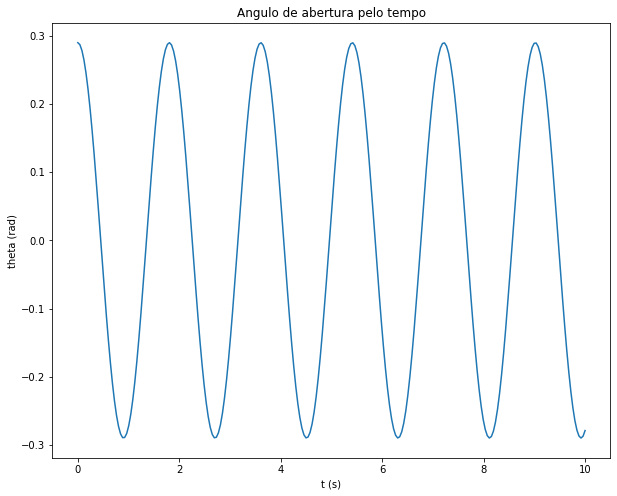

In [21]:
# Create chart

plt.xlabel('t (s)')
plt.ylabel('theta (rad)')
plt.title('Angulo de abertura pelo tempo')
plt.plot(t, sol.T[0])
plt.rcParams['figure.figsize'] = (10, 8)
plt.show()

In [22]:
# Define x and y as functions of theta
data = extract_data("small")
data = refine_data(data, "small")
data = increse_delta_time(data, 2)

theta = np.arcsin(data.T[1]/g)
x_exp = np.array(L * np.sin(theta))
y_exp = np.array(-L * np.cos(theta))

x = np.array(L * np.sin(sol.T[0]))
y = np.array(-L * np.cos(sol.T[0]))

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
# Function to return blanck frame
def init():
    ln1.set_data([], [])
    ln2.set_data([], [])
    
    return ln1, ln2

# Function to animeta pendulum
def animate(frame):
    ln1.set_data([0, x[frame]], [0, y[frame]])
    ln2.set_data([0, x_exp[frame]], [0, y_exp[frame]])
    
    return ln1, ln2

NameError: name 'animate' is not defined

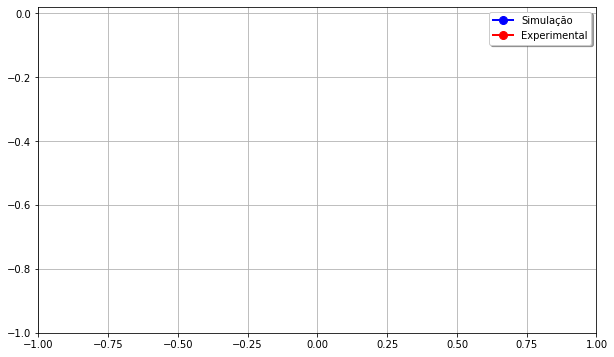

In [11]:
# Generate gif

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ln1, = plt.plot([], [], 'bo-', lw=2, markersize=8, label="Simulação")
ln2, = plt.plot([], [], 'ro-', lw=2, markersize=8, label="Experimental")

ax.legend(framealpha=1, shadow=True)

ax.grid()
ax.set_ylim(-1, 0.02)
ax.set_xlim(-1, 1)

plt.rcParams['animation.embed_limit'] = 2**64
plt.rcParams["animation.html"] = "jshtml"

animation = FuncAnimation(fig, animate,init_func=init, frames=250, interval=50, blit=True)
animation.save("pendulum.gif", writer='pillow', fps=25)

In [12]:
# Show Animation

animation

NameError: name 'animation' is not defined